In [2]:
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt

import pystan

# Example 1

In [2]:
schools_code = """
data {
    int<lower=0> J; // number of schools
    real y[J]; // estimated treatment effects
    real<lower=0> sigma[J]; // s.e. of effect estimates
}
parameters {
    real mu;
    real<lower=0> tau;
    real eta[J];
}
transformed parameters {
    real theta[J];
    for (j in 1:J)
    theta[j] = mu + tau * eta[j];
}
model {
    eta ~ normal(0, 1);
    y ~ normal(theta, sigma);
}
"""

schools_dat = {'J': 8,
               'y': [28,  8, -3,  7, -1,  1, 18, 12],
               'sigma': [15, 10, 16, 11,  9, 11, 10, 18]}

sm = pystan.StanModel(model_code=schools_code)
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_cbe9cd2f1e5ab5d1c7cce1f23ca970b4 NOW.


Reading the model from file

In [3]:
sm = pystan.StanModel(file='8schools.stan')
fit = sm.sampling(data=schools_dat, iter=1000, chains=4)

INFO:pystan:COMPILING THE C++ CODE FOR MODEL anon_model_5f0bdf0403318871b8fe126f239ca318 NOW.


NameError: name 'schools_dat' is not defined

In [13]:
fit2 = sm.sampling(data=schools_dat, iter=10000, chains=4)



<IPython.core.display.Javascript object>


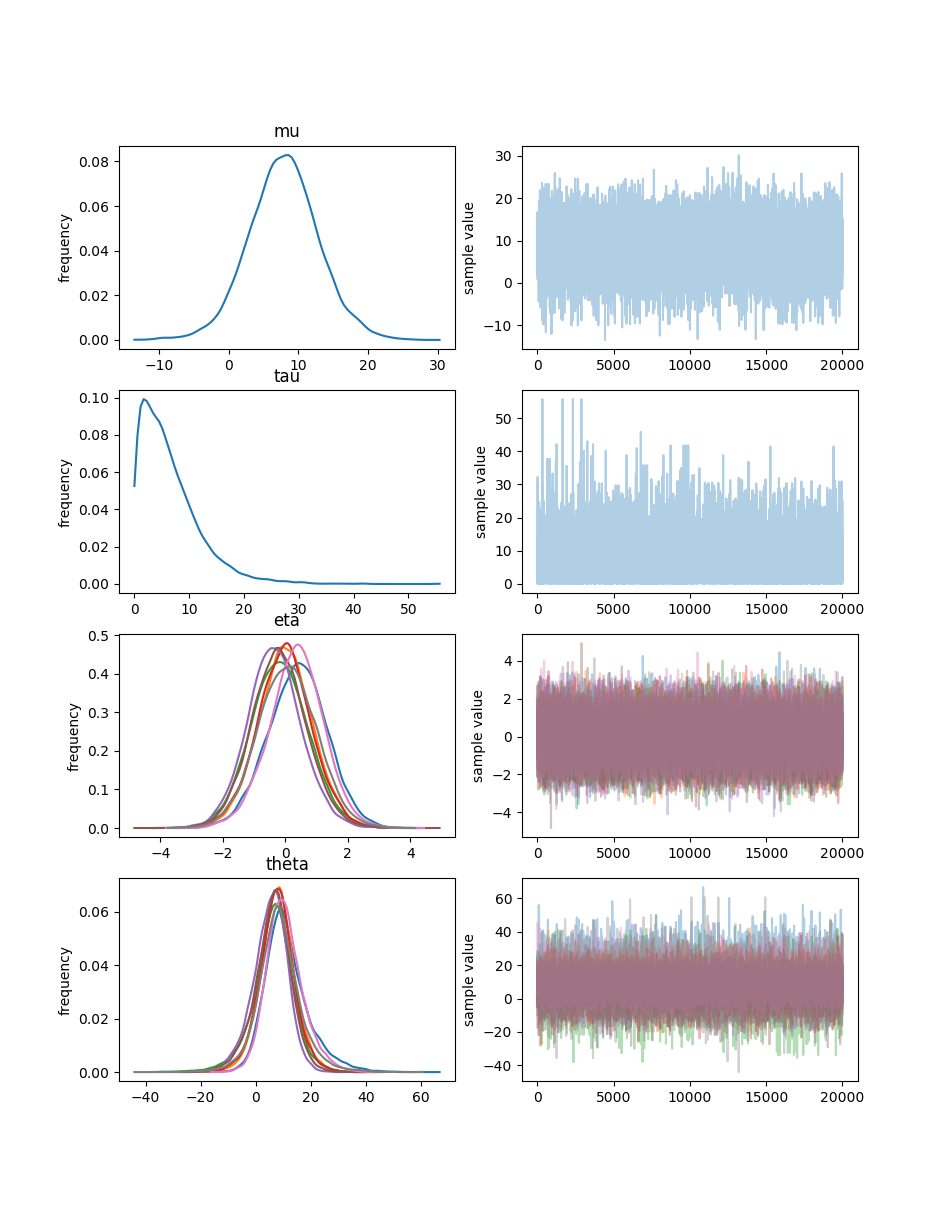

In [16]:
fit2.plot();

In [17]:
la = fit.extract(permuted=True)  # return a dictionary of arrays
mu = la['mu']

## return an array of three dimensions: iterations, chains, parameters
a = fit.extract(permuted=False)

In [22]:
fit.extract()

{'chains': 4,
 'dims_oi': [[], [], [8], [8], []],
 'fnames_oi': ['mu',
  'tau',
  'eta[0]',
  'eta[1]',
  'eta[2]',
  'eta[3]',
  'eta[4]',
  'eta[5]',
  'eta[6]',
  'eta[7]',
  'theta[0]',
  'theta[1]',
  'theta[2]',
  'theta[3]',
  'theta[4]',
  'theta[5]',
  'theta[6]',
  'theta[7]',
  'lp__'],
 'iter': 1000,
 'n_flatnames': 19,
 'n_save': [1000, 1000, 1000, 1000],
 'pars_oi': ['mu', 'tau', 'eta', 'theta', 'lp__'],
 'permutation': [array([ 54,  71, 370, 311, 366, 256, 181,  94, 375, 183, 330, 404,  12,
          63, 268, 489, 313,  61, 389, 398, 360, 355, 258, 358, 116, 345,
         406, 226, 243, 296, 480, 290, 474, 168, 175, 179, 383, 271, 319,
         344, 118,  69, 458, 391, 343, 172, 429, 224,  13, 121, 275, 269,
           3, 136, 169, 276, 231, 350,  32, 416, 418, 274, 413, 242, 260,
         152, 285,  76, 297, 279, 333, 384, 180, 237, 423, 444, 488,  72,
         182, 396, 328, 295, 340, 161, 356, 157, 244, 365, 103,  14,  80,
         223, 453, 399,  48, 266, 277,   2, 1

In [24]:
print(sm.model_code)

data {
  int<lower=0> J; // number of schools 
  real y[J]; // estimated treatment effects
  real<lower=0> sigma[J]; // s.e. of effect estimates 
}
parameters {
  real mu; 
  real<lower=0> tau;
  real eta[J];
}
transformed parameters {
  real theta[J];
  for (j in 1:J)
    theta[j] = mu + tau * eta[j];
}
model {
  eta ~ normal(0, 1);
  y ~ normal(theta, sigma);
}

